## **RTA project by:** 
- Anastasia Karuzina 85536
- Mateusz Konarczyk 119461
- Anastasiya Pogrebytska 110068
- Barbara Śmiech 77571


**The purpose of our work was to consider data on exchange summaries from the perspective of an investor.**

The work is designed to optimize the work of the investor using the following strategy:

a) definition of "movable" valuable papers

b) identifying the potential for significant change

c) symbiosis of the data obtained to select the most "moving" valuable papers with the largest potential for possible changes (growth - in a bull market and fall - in a bear market)

An extension of our application will be the analysis of stock performance in time tenors: daily, weekly, monthly and yearly. The projects concentrates on WIG20 stock listed companies. 

**The project is structured as follows:**


1.   Retrieval of financial data (in R)
2.   Calculation of stock perfromance (in R)
3. Visualisation of best and worse performers (in Python)
4. Application of investment strategy (in Python)


Environment setup for R

In [4]:
pip install rpy2

Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/opt/anaconda3/lib/python3.7/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/opt/anaconda3/lib/python3.7/site-packages/pip/__main__.py", line 29, in <module>
    from pip._internal.cli.main import main as _main
  File "/opt/anaconda3/lib/python3.7/site-packages/pip/_internal/__init__.py", line 4, in <module>
    from pip._internal.utils import _log
ImportError: cannot import name '_log' from 'pip._internal.utils' (/opt/anaconda3/lib/python3.7/site-packages/pip/_internal/utils/__init__.py)
Note: you may need to restart the kernel to use updated packages.


Install extension to use R in jupyter

In [5]:
%load_ext rpy2.ipython

Unable to determine R library path: Command '('/opt/anaconda3/lib/R/bin/Rscript', '-e', 'cat(Sys.getenv("LD_LIBRARY_PATH"))')' died with <Signals.SIGABRT: 6>.


OSError: cannot load library '/opt/anaconda3/lib/R/lib/libR.dylib': dlopen(/opt/anaconda3/lib/R/lib/libR.dylib, 0x0002): Library not loaded: @rpath/libreadline.6.2.dylib
  Referenced from: /opt/anaconda3/lib/R/lib/libR.dylib
  Reason: tried: '/opt/anaconda3/lib/R/lib/../../libreadline.6.2.dylib' (no such file), '/opt/anaconda3/lib/R/lib/../../libreadline.6.2.dylib' (no such file), '/opt/anaconda3/lib/libreadline.6.2.dylib' (no such file), '/opt/anaconda3/lib/libreadline.6.2.dylib' (no such file), '/opt/anaconda3/lib/libreadline.6.2.dylib' (no such file), '/opt/anaconda3/lib/python3.7/site-packages/../../libreadline.6.2.dylib' (no such file), '/opt/anaconda3/lib/libreadline.6.2.dylib' (no such file), '/opt/anaconda3/lib/libreadline.6.2.dylib' (no such file), '/opt/anaconda3/bin/../lib/libreadline.6.2.dylib' (no such file), '/usr/local/lib/libreadline.6.2.dylib' (no such file), '/usr/lib/libreadline.6.2.dylib' (no such file)

Install packages

In [ ]:
%%R
install.packages("quantmod")
install.packages("lubridate")
install.packages("jsonlite")

R[write to console]: Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

R[write to console]: also installing the dependencies ‘xts’, ‘zoo’, ‘TTR’


R[write to console]: trying URL 'https://cran.rstudio.com/src/contrib/xts_0.12.1.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 517875 bytes (505 KB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[

Activate packages

In [ ]:
%%R
library(quantmod)
library(lubridate)
library(jsonlite)

R[write to console]: Loading required package: xts

R[write to console]: Loading required package: zoo

R[write to console]: 
Attaching package: ‘zoo’


R[write to console]: The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric


R[write to console]: Loading required package: TTR

R[write to console]: Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 

R[write to console]: 
Attaching package: ‘lubridate’


R[write to console]: The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union




Define stock tickers and names of companies listed on WIG20 index

In [ ]:
%%R
stock_symbols <- c("ALE.WA", "ALR.WA", "CCC.WA", "CDR.WA",
                   "CPS.WA", "DNP.WA", "JSW.WA", "KGH.WA",
                   "LPP.WA", "LTS.WA", "MRC.WA", "OPL.WA",
                   "PEO.WA", "PGE.WA", "PGN.WA", "PKN.WA",
                   "PKO.WA", "PZU.WA",  "SPL.WA", "TPE.WA")
Stock_names <- c("Allegro", "Alior Bank" , "CCC", "CD Projekt",
                 "Cyfrowy Polsat", "Dino Polska", "JSW", "KGHM",
                 "LPP SA", "Grupa LOTOS", "Mercator Medical", "Orange Polska",
                 "Pekao", "PGE", "PGNiG", "Orlen", 
                 "PKO", "PZU",  "Santander Bank", "Tauron")

Retrieve last quotes

In [ ]:
%%R
wig_lastest_v <- getQuote(stock_symbols, 
                          src = "yahoo")$Last

In [ ]:
%%R
wig_lastest_v

 [1]    23.155    33.070    51.860   106.860    21.100   312.500    68.420
 [8]   148.200 10190.000    76.500    59.280     6.154    92.100    10.495
[15]     5.978    74.860    31.440    31.620   255.600     3.325


Retrieve prices of previous day

In [ ]:
%%R
wig_previousday_e <- new.env()
wig_previousday_v <- c()

#Previous day - date correction
pd_correction <- 1

if (wday(Sys.Date(), week_start = 1) == 6){
  pd_correction <- 2
} else if (wday(Sys.Date(), week_start = 1) == 7){
  pd_correction <- 3
} else if (wday(Sys.Date(), week_start = 1) == 1){
  pd_correction <- 3
} else {
  pd_correction <- 1
}

pd_timecorrection <- 0
if(as.numeric(substr(x = Sys.time(), start = 12, stop = 13)) >= 0 &  as.numeric(substr(x = Sys.time(), start = 12, stop = 13)) <= 9){
  pd_timecorrection <- 1
} else {
  pd_timecorrection <- 0
}


date_pd <- Sys.Date() - pd_correction - pd_timecorrection

#Previous day - retrieve data

getSymbols(stock_symbols, 
           src = "yahoo", 
           from = date_pd,
           to = date_pd + 1,
           periodicity = "daily",
           env = wig_previousday_e)

for(i in 1:length(stock_symbols)){
  wig_previousday_v <- cbind(wig_previousday_v, as.list(wig_previousday_e)[order(names(as.list(wig_previousday_e)))][[i]][[4]]) 
}

R[write to console]: pausing 1 second between requests for more than 5 symbols

R[write to console]: pausing 1 second between requests for more than 5 symbols

R[write to console]: pausing 1 second between requests for more than 5 symbols

R[write to console]: pausing 1 second between requests for more than 5 symbols

R[write to console]: pausing 1 second between requests for more than 5 symbols

R[write to console]: pausing 1 second between requests for more than 5 symbols

R[write to console]: pausing 1 second between requests for more than 5 symbols

R[write to console]: pausing 1 second between requests for more than 5 symbols

R[write to console]: pausing 1 second between requests for more than 5 symbols

R[write to console]: pausing 1 second between requests for more than 5 symbols

R[write to console]: pausing 1 second between requests for more than 5 symbols

R[write to console]: pausing 1 second between requests for more than 5 symbols

R[write to console]: pausing 1 second be

Retrieve price from week ago (7 days)

In [ ]:
%%R

### Week ago - prices
wig_weekago_e <- new.env()
wig_weekago_v <- c()

#Week ago - date correction
date_weekago_correction <- 0

if (wday(Sys.Date() - 7, week_start = 1) == 6){
  date_weekago_correction <- 1
} else if (wday(Sys.Date() - 7, week_start = 1) == 7){
  date_weekago_correction <- 2
}  else {
  date_weekago_correction <- 0
}

date_weekago <- Sys.Date() - 7 - date_weekago_correction

#Week ago - retrieve data

getSymbols(stock_symbols, 
           src = "yahoo", 
           from = date_weekago,
           to = date_weekago + 1,
           periodicity = "daily",
           env = wig_weekago_e)

for(i in 1:length(stock_symbols)){
  wig_weekago_v <- cbind(wig_weekago_v, as.list(wig_weekago_e)[order(names(as.list(wig_weekago_e)))][[i]][[4]]) 
}


R[write to console]: pausing 1 second between requests for more than 5 symbols

R[write to console]: pausing 1 second between requests for more than 5 symbols

R[write to console]: pausing 1 second between requests for more than 5 symbols

R[write to console]: pausing 1 second between requests for more than 5 symbols

R[write to console]: pausing 1 second between requests for more than 5 symbols

R[write to console]: pausing 1 second between requests for more than 5 symbols

R[write to console]: pausing 1 second between requests for more than 5 symbols

R[write to console]: pausing 1 second between requests for more than 5 symbols

R[write to console]: pausing 1 second between requests for more than 5 symbols

R[write to console]: pausing 1 second between requests for more than 5 symbols

R[write to console]: pausing 1 second between requests for more than 5 symbols

R[write to console]: pausing 1 second between requests for more than 5 symbols

R[write to console]: pausing 1 second be

Retrieve prices 1 month ago

In [ ]:
%%R

### Month ago - prices
wig_monthago_e <- new.env()
wig_monthago_v <- c()

# Month ago - date correction
date_monthago_correction <- 0

if (wday(Sys.Date() - 30, week_start = 1) == 6){
  date_monthago_correction <- 1
} else if (wday(Sys.Date() - 30, week_start = 1) == 7){
  date_monthago_correction <- 2
}  else {
  date_monthago_correction <- 0
}

date_monthago <- Sys.Date() - 30 - date_monthago_correction

#Month ago - retrieve data

getSymbols(stock_symbols, 
           src = "yahoo", 
           from = date_monthago,
           to = date_monthago + 1,
           periodicity = "daily",
           env = wig_monthago_e)

for(i in 1:length(stock_symbols)){
  wig_monthago_v <- cbind(wig_monthago_v, as.list(wig_monthago_e)[order(names(as.list(wig_monthago_e)))][[i]][[4]]) 
}

R[write to console]: pausing 1 second between requests for more than 5 symbols

R[write to console]: pausing 1 second between requests for more than 5 symbols

R[write to console]: pausing 1 second between requests for more than 5 symbols

R[write to console]: pausing 1 second between requests for more than 5 symbols

R[write to console]: pausing 1 second between requests for more than 5 symbols

R[write to console]: pausing 1 second between requests for more than 5 symbols

R[write to console]: pausing 1 second between requests for more than 5 symbols

R[write to console]: pausing 1 second between requests for more than 5 symbols

R[write to console]: pausing 1 second between requests for more than 5 symbols

R[write to console]: pausing 1 second between requests for more than 5 symbols

R[write to console]: pausing 1 second between requests for more than 5 symbols

R[write to console]: pausing 1 second between requests for more than 5 symbols

R[write to console]: pausing 1 second be

Retrieve prices 1 year ago

In [ ]:
%%R

### Year ago - prices
wig_yearago_e <- new.env()
wig_yearago_v <- c()

# Year ago - date correction
date_yearago_correction <- 0

if (wday(Sys.Date() - 365, week_start = 1) == 6){
  date_yearago_correction <- 1
} else if (wday(Sys.Date() - 365, week_start = 1) == 7){
  date_yearago_correction <- 2
}  else {
  date_yearago_correction <- 0
}

date_yearago <- Sys.Date() - 365 - date_yearago_correction


getSymbols(stock_symbols, 
           src = "yahoo", 
           from = date_yearago,
           to = date_yearago + 1,
           periodicity = "daily",
           env = wig_yearago_e)

for(i in 1:length(stock_symbols)){
  wig_yearago_v <- cbind(wig_yearago_v, as.list(wig_yearago_e)[order(names(as.list(wig_yearago_e)))][[i]][[4]]) 
}

R[write to console]: pausing 1 second between requests for more than 5 symbols

R[write to console]: pausing 1 second between requests for more than 5 symbols

R[write to console]: pausing 1 second between requests for more than 5 symbols

R[write to console]: pausing 1 second between requests for more than 5 symbols

R[write to console]: pausing 1 second between requests for more than 5 symbols

R[write to console]: pausing 1 second between requests for more than 5 symbols

R[write to console]: pausing 1 second between requests for more than 5 symbols

R[write to console]: pausing 1 second between requests for more than 5 symbols

R[write to console]: pausing 1 second between requests for more than 5 symbols

R[write to console]: pausing 1 second between requests for more than 5 symbols

R[write to console]: pausing 1 second between requests for more than 5 symbols

R[write to console]: pausing 1 second between requests for more than 5 symbols

R[write to console]: pausing 1 second be

Create dataframe with all prices

In [ ]:
%%R
wig_prices <- as.data.frame(rbind(wig_lastest_v, wig_previousday_v, wig_weekago_v, wig_monthago_v, wig_yearago_v))
names(wig_prices) <- Stock_names
rownames(wig_prices) <- c("Latest price" ,"Price previous day", "Price 1 week ago", "Price 1 month ago", "Price 1 year ago")
wig_prices <- t(round(wig_prices, 2))
wig_prices

                 Latest price Price previous day Price 1 week ago
Allegro                 23.16              22.89            25.03
Alior Bank              33.07              32.80            34.00
CCC                     51.86              50.74            51.60
CD Projekt             106.86             104.20           113.10
Cyfrowy Polsat          21.10              21.26            22.06
Dino Polska            312.50             314.10           297.30
JSW                     68.42              65.80            67.50
KGHM                   148.20             145.55           146.55
LPP SA               10190.00           10250.00         10370.00
Grupa LOTOS             76.50              75.80            69.42
Mercator Medical        59.28              59.50            63.46
Orange Polska            6.15               6.13             6.06
Pekao                   92.10              90.74            94.32
PGE                     10.49              10.57            10.37
PGNiG     

Calculate daily, weekly, monthly and yearly performance

In [ ]:
%%R
wig_returns <- round(apply(wig_prices[,-1], MARGIN = 2, function(x) (wig_prices[,1]/x)-1), 4)
colnames(wig_returns) <- c("Daily return", "Weekly return", "Monthly return", "Yearly return")
wig_returns

                 Daily return Weekly return Monthly return Yearly return
Allegro                0.0118       -0.0747         0.0551       -0.6059
Alior Bank             0.0082       -0.0274         0.0334       -0.0483
CCC                    0.0221        0.0050         0.1198       -0.5550
CD Projekt             0.0255       -0.0552        -0.0924       -0.3758
Cyfrowy Polsat        -0.0075       -0.0435        -0.0998       -0.3132
Dino Polska           -0.0051        0.0511         0.1282        0.0904
JSW                    0.0398        0.0136         0.0301        0.9219
KGHM                   0.0182        0.0113         0.1583       -0.2746
LPP SA                -0.0059       -0.0174         0.1856       -0.0719
Grupa LOTOS            0.0092        0.1020         0.0845        0.4320
Mercator Medical      -0.0037       -0.0659        -0.2039       -0.7595
Orange Polska          0.0033        0.0149        -0.0207       -0.0982
Pekao                  0.0150       -0.0235        

In [ ]:
%%R
#Daily performers - top 5 and worse 5
daily_top5 <- wig_returns[order(wig_returns[, 1],decreasing = TRUE), 1][1:5]
daily_worse5 <- wig_returns[order(wig_returns[, 1],decreasing = FALSE), 1][1:5]

#Weekly performers - top 5 and worse 5
weekly_top5 <- wig_returns[order(wig_returns[, 2],decreasing = TRUE), 2][1:5]
weekly_worse5 <- wig_returns[order(wig_returns[, 2],decreasing = FALSE), 2][1:5]

#Monthly performers - top 5 and worse 5
monthly_top5 <- wig_returns[order(wig_returns[, 3],decreasing = TRUE), 3][1:5]
monthly_worse5 <- wig_returns[order(wig_returns[, 3],decreasing = FALSE), 3][1:5]

#Yearly performers - top 5 and worse 5
yearly_top5 <- wig_returns[order(wig_returns[, 4],decreasing = TRUE), 4][1:5]
yearly_worse5 <- wig_returns[order(wig_returns[, 4],decreasing = FALSE), 4][1:5]


Convert R data objects to python

In [ ]:
import pandas as pd

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

In [3]:
wig20_prices = %R wig_prices
wig20_prices = pd.DataFrame(wig20_prices, 
                            columns = ["Latest price" ,"Price previous day", "Price 1 week ago", "Price 1 month ago", "Price 1 year ago"],
                            index = ["Allegro", "Alior Bank" , "CCC", "CD Projekt",
                                    "Cyfrowy Polsat", "Dino Polska", "JSW", "KGHM",
                                    "LPP SA", "Grupa LOTOS", "Mercator Medical", "Orange Polska",
                                    "Pekao", "PGE", "PGNiG", "Orlen", 
                                    "PKO", "PZU",  "Santander Bank", "Tauron"])

UsageError: Line magic function `%R` not found.


In [ ]:
wig20_prices

,Latest price,Price previous day,Price 1 week ago,Price 1 month ago,Price 1 year ago
Allegro,23.16,22.89,25.03,21.95,58.77
Alior Bank,33.07,32.80,34.00,32.00,34.75
CCC,51.86,50.74,51.60,46.31,116.55
CD Projekt,106.86,104.20,113.10,117.74,171.20
Cyfrowy Polsat,21.10,21.26,22.06,23.44,30.72
Dino Polska,312.50,314.10,297.30,277.00,286.60
JSW,68.42,65.80,67.50,66.42,35.60
KGHM,148.20,145.55,146.55,127.95,204.30
LPP SA,10190.00,10250.00,10370.00,8595.00,10980.00
Grupa LOTOS,76.50,75.80,69.42,70.54,53.42


In [ ]:
df = wig20_prices.drop('LPP SA')

Text(0.5, 1.0, 'Latest share price of WIG20 companies')

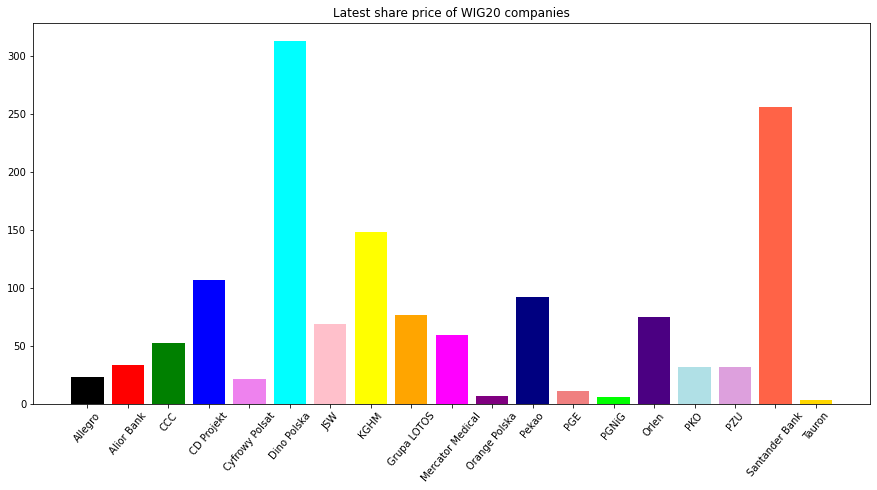

In [ ]:
plt.figure(figsize=(15,7))
 
plt.bar(x=df.index,
 
        height=df["Latest price"],
 
        color=['black', 'red', 'green', 'blue','violet', 'cyan', 'pink', 'yellow', 'orange', 'magenta', 'purple', 'navy', 'lightcoral', 'lime','indigo','powderblue', 'plum', 'tomato', 'gold'])
 
plt.xticks(rotation=50)
plt.title("Latest share price of WIG20 companies")

In [ ]:
wig20_returns = %R wig_returns
wig20_returns = pd.DataFrame(wig20_returns, 
                            columns = ["Daily return", "Weekly return", "Monthly return", "Yearly return"],
                            index = ["Allegro", "Alior Bank" , "CCC", "CD Projekt",
                                    "Cyfrowy Polsat", "Dino Polska", "JSW", "KGHM",
                                    "LPP SA", "Grupa LOTOS", "Mercator Medical", "Orange Polska",
                                    "Pekao", "PGE", "PGNiG", "Orlen", 
                                    "PKO", "PZU",  "Santander Bank", "Tauron"])

In [ ]:
wig20_returns

,Daily return,Weekly return,Monthly return,Yearly return
Allegro,0.0118,-0.0747,0.0551,-0.6059
Alior Bank,0.0082,-0.0274,0.0334,-0.0483
CCC,0.0221,0.0050,0.1198,-0.5550
CD Projekt,0.0255,-0.0552,-0.0924,-0.3758
Cyfrowy Polsat,-0.0075,-0.0435,-0.0998,-0.3132
Dino Polska,-0.0051,0.0511,0.1282,0.0904
JSW,0.0398,0.0136,0.0301,0.9219
KGHM,0.0182,0.0113,0.1583,-0.2746
LPP SA,-0.0059,-0.0174,0.1856,-0.0719
Grupa LOTOS,0.0092,0.1020,0.0845,0.4320


In [ ]:
#Daily performers - top 5 and worse 5
daily_top5 =  wig20_returns["Daily return"].sort_values(ascending = False)[0:5]
daily_worse5 =  wig20_returns["Daily return"].sort_values(ascending = True)[0:5]

In [ ]:
#Weekly performers - top 5 and worse 5
weekly_top5 =  wig20_returns["Weekly return"].sort_values(ascending = False)[0:5]
weekly_worse5 =  wig20_returns["Weekly return"].sort_values(ascending = True)[0:5]

In [ ]:
#Monthly performers - top 5 and worse 5
monthly_top5 =  wig20_returns["Monthly return"].sort_values(ascending = False)[0:5]
monthly_worse5 =  wig20_returns["Monthly return"].sort_values(ascending = True)[0:5]

In [ ]:
#Yearly performers - top 5 and worse 5
yearly_top5 =  wig20_returns["Yearly return"].sort_values(ascending = False)[0:5]
yearly_worse5 =  wig20_returns["Yearly return"].sort_values(ascending = True)[0:5]

In [ ]:
#Objects which can be accessed: wig20_prices, wig20_returns, daily_top5, daily_worse5, weekly_top5, weekly_worse5, monthly_top5, monthly_worse5, yearly_top5, yearly_worse5

In [ ]:
daily_top5

JSW           0.0398
CD Projekt    0.0255
Orlen         0.0255
CCC           0.0221
PZU           0.0213
Name: Daily return, dtype: float64

In [ ]:
daily_worse5

PGE                -0.0076
Cyfrowy Polsat     -0.0075
LPP SA             -0.0059
Dino Polska        -0.0051
Mercator Medical   -0.0037
Name: Daily return, dtype: float64

In [ ]:
yearly_top5

JSW            0.9219
Grupa LOTOS    0.4320
Dino Polska    0.0904
PGE           -0.0178
Alior Bank    -0.0483
Name: Yearly return, dtype: float64

### **Visualisation of returns**



Visualisation done with gridspec in order to combine graphs for more comprehensive visual analysis.

1. Visualisation of daily returns along with top 5 performers with the highest daily returns and 5 worst performers with the lowest daily returns.


In [ ]:
import matplotlib.gridspec as gridspec

In [ ]:
# defining masks as values below 0 and above 0 - colours differentiation
x = wig20_returns.index
y = wig20_returns["Daily return"]

mask1 = y < 0
mask2 = y >= 0

Text(0.5, 1.0, '5 performers with the lowest daily return')

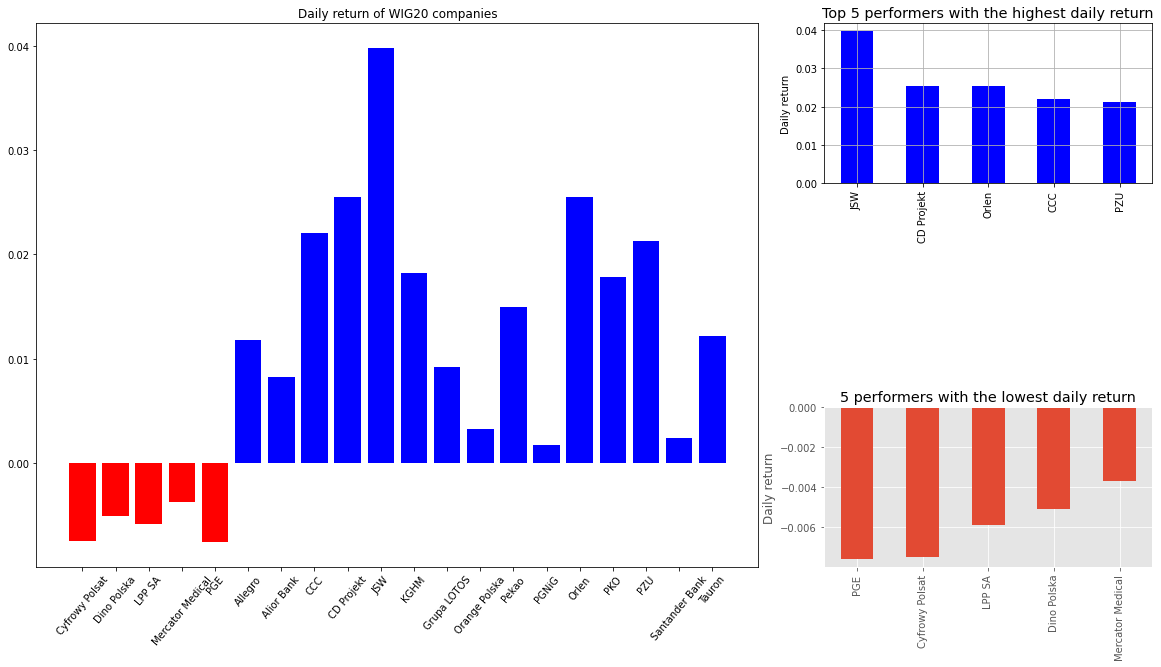

In [ ]:
gridsize = (3, 3)
fig = plt.figure(figsize=(20, 10))
ax1 = plt.subplot2grid(gridsize, (0, 0), colspan=2, rowspan=3)
plt.bar(x[mask1], y[mask1], color = 'red')
plt.bar(x[mask2], y[mask2], color = 'blue')
plt.xticks(rotation=50)
plt.title("Daily return of WIG20 companies")

ax2 = plt.subplot2grid(gridsize, (0, 2))
plt.style.use('ggplot')
daily_top5.T.plot(kind='bar', color='blue')
plt.ylabel('Daily return')
plt.title('Top 5 performers with the highest daily return')

ax3 = plt.subplot2grid(gridsize, (2, 2))
plt.style.use('ggplot')
daily_worse5.T.plot(kind='bar')
plt.ylabel('Daily return')
plt.title('5 performers with the lowest daily return')


2. Visualisation of weekly returns along with top 5 performers with the highest weekly returns and 5 worst performers with the lowest weekly returns.

In [ ]:
x = wig20_returns.index
y = wig20_returns["Weekly return"]

mask1 = y < 0
mask2 = y >= 0

Text(0.5, 1.0, '5 performers with the lowest weekly return')

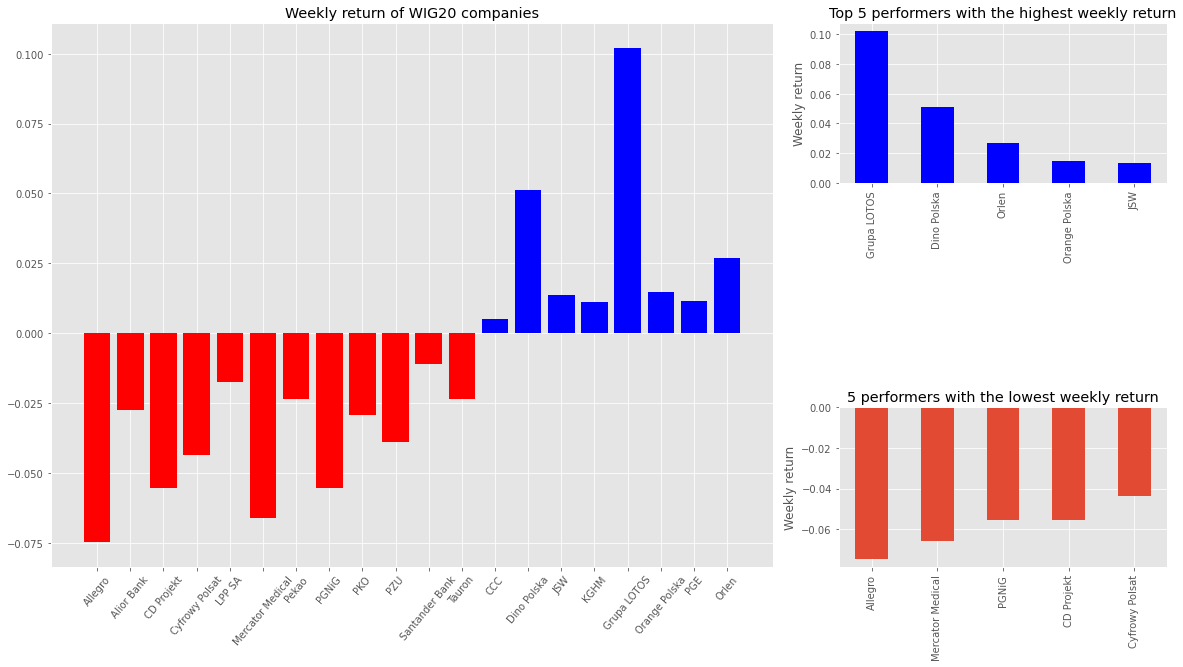

In [ ]:
gridsize = (3, 3)
fig = plt.figure(figsize=(20, 10))
ax1 = plt.subplot2grid(gridsize, (0, 0), colspan=2, rowspan=3)
plt.bar(x[mask1], y[mask1], color = 'red')
plt.bar(x[mask2], y[mask2], color = 'blue')
plt.xticks(rotation=50)
plt.title("Weekly return of WIG20 companies")

ax2 = plt.subplot2grid(gridsize, (0, 2))
plt.style.use('ggplot')
weekly_top5.T.plot(kind='bar', color='blue')
plt.ylabel('Weekly return')
plt.title('Top 5 performers with the highest weekly return')

ax3 = plt.subplot2grid(gridsize, (2, 2))
plt.style.use('ggplot')
weekly_worse5.T.plot(kind='bar')
plt.ylabel('Weekly return')
plt.title('5 performers with the lowest weekly return')


3. Visualisation of monthly returns along with top 5 performers with the highest monthly returns and 5 worst performers with the lowest monthly returns.

In [ ]:
x = wig20_returns.index
y = wig20_returns["Monthly return"]

mask1 = y < 0
mask2 = y >= 0

Text(0.5, 1.0, '5 performers with the lowest monthly return')

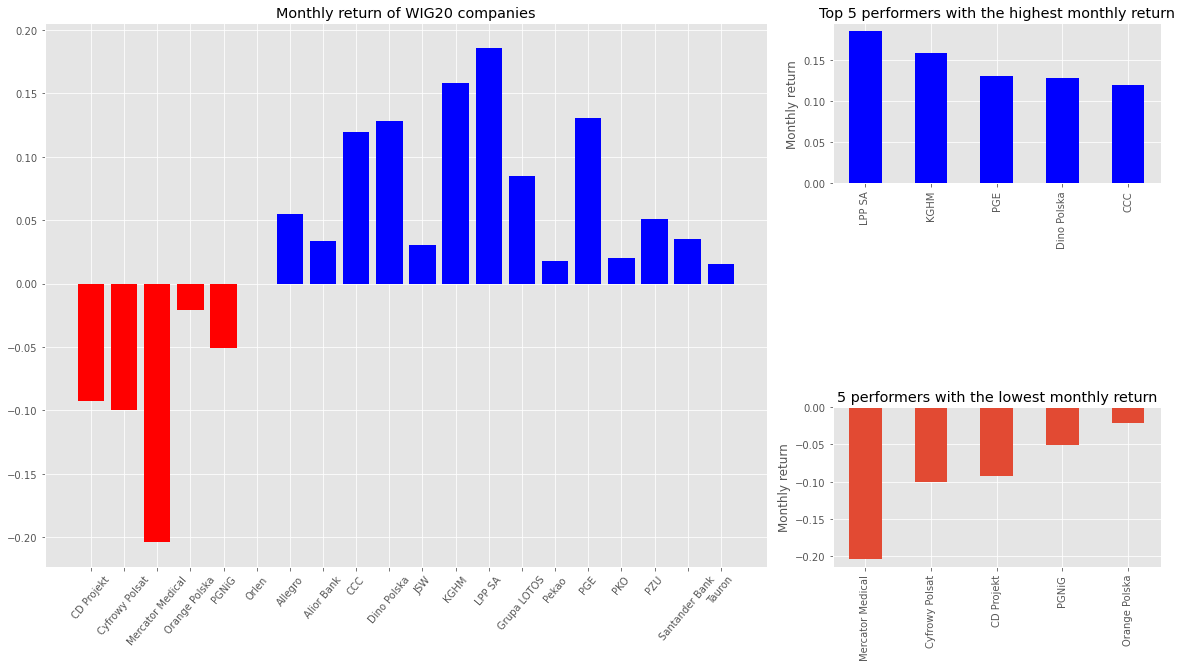

In [ ]:
gridsize = (3, 3)
fig = plt.figure(figsize=(20, 10))
ax1 = plt.subplot2grid(gridsize, (0, 0), colspan=2, rowspan=3)
plt.bar(x[mask1], y[mask1], color = 'red')
plt.bar(x[mask2], y[mask2], color = 'blue')
plt.xticks(rotation=50)
plt.title("Monthly return of WIG20 companies")

ax2 = plt.subplot2grid(gridsize, (0, 2))
plt.style.use('ggplot')
monthly_top5.T.plot(kind='bar', color='blue')
plt.ylabel('Monthly return')
plt.title('Top 5 performers with the highest monthly return')

ax3 = plt.subplot2grid(gridsize, (2, 2))
plt.style.use('ggplot')
monthly_worse5.T.plot(kind='bar')
plt.ylabel('Monthly return')
plt.title('5 performers with the lowest monthly return')

4. Visualisation of yearly returns along with top 5 performers with the highest yearly returns and 5 worst performers with the lowest yearly returns.

In [ ]:
x = wig20_returns.index
y = wig20_returns["Yearly return"]

mask1 = y < 0
mask2 = y >= 0

Text(0.5, 1.0, '5 performers with the lowest yearly return')

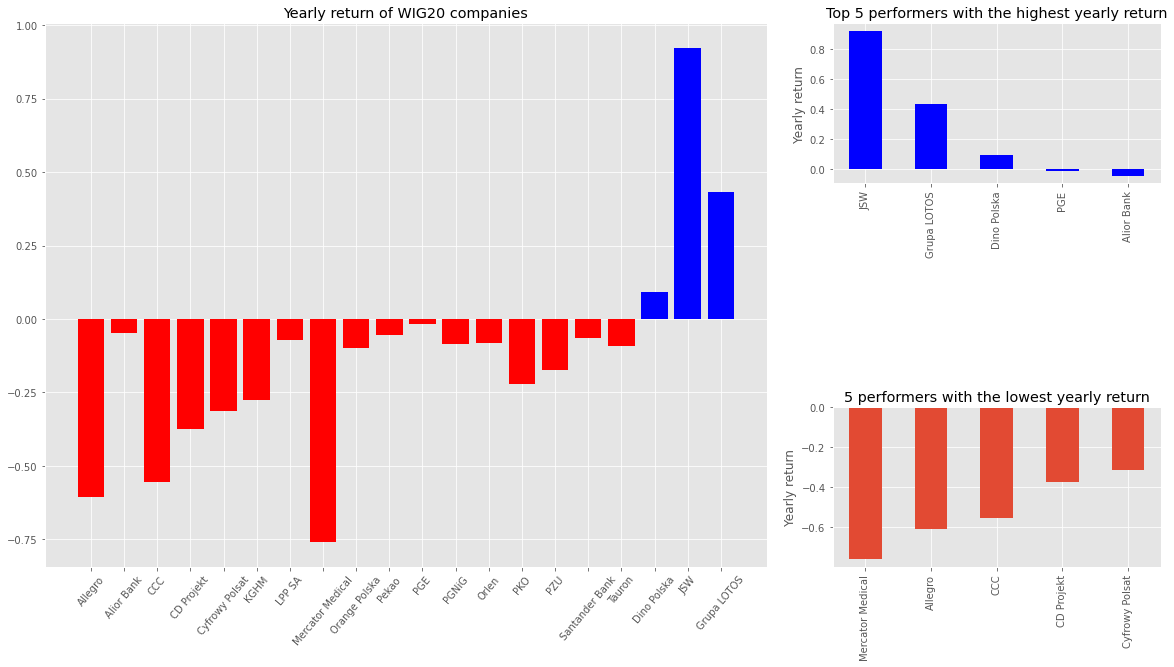

In [ ]:
gridsize = (3, 3)
fig = plt.figure(figsize=(20, 10))
ax1 = plt.subplot2grid(gridsize, (0, 0), colspan=2, rowspan=3)
plt.bar(x[mask1], y[mask1], color = 'red')
plt.bar(x[mask2], y[mask2], color = 'blue')
plt.xticks(rotation=50)
plt.title("Yearly return of WIG20 companies")

ax2 = plt.subplot2grid(gridsize, (0, 2))
plt.style.use('ggplot')
yearly_top5.T.plot(kind='bar', color='blue')
plt.ylabel('Yearly return')
plt.title('Top 5 performers with the highest yearly return')

ax3 = plt.subplot2grid(gridsize, (2, 2))
plt.style.use('ggplot')
yearly_worse5.T.plot(kind='bar')
plt.ylabel('Yearly return')
plt.title('5 performers with the lowest yearly return')

**Thus using the "Top 5 performers with the highest yearly return" we defined the most "movable" valuable papers, which are JSW, Grupa LOTOS, Dino Polska, PGE, Alior Bank.**

### **Application of investment strategy**

Consider a strategy where an investor is interested in the maximum share price and the minimum price for the last year or month.

As you know, the investor needs to make a decision in accordance with the type of market - a rising or "bullish" market or a declining "bear" one.

A rising market strategy (bull market) assumes that the price per share has already reached its peak for the year and will try to reach the same value - the maximum price again.
A falling market (bear market) strategy assumes that the price per share has already reached the biggest low of the year and will try to reach the lowest price again.

 In our case, we chose a strategy based on data for one calendar year.

Accordingly, for this, the investor needs to have data on the maximum and minimum value of the share, as well as what its price is today.

First of all, after analysis of the data we create a new dataframe with Latest price, Maximim price, Minimum price, and the Percent difference of the Latest price to Maximim and Minimum values.

In [ ]:
df3 = pd.DataFrame(wig20_prices, columns = ["Latest price", "Max", "Min", "% Max", "% Min"])
#print(df3.index)

Next we would like to fill the columns of Maximim, Minimum values via API querries according to the chosen period, in our case previous year. 

After running this code we will see the life-time general variations in the price of each of 20 companies; the table with needed data for our investor with Max, Min values and the % difference according to the latest price.

In [ ]:
import time
import datetime
now = datetime.datetime.now()
#determine the time periods for analysis - previous year from current day
period2 = int(time.mktime(now.timetuple()))
period1 = int(time.mktime(now.replace(year = now.year -1).timetuple()))
interval = '1d'

stock_symbols_20 = %R stock_symbols

for index, ticker in enumerate(stock_symbols_20):
  query_string = f'https://query1.finance.yahoo.com/v7/finance/download/{ticker}?period1={period1}&period2={period2}&interval={interval}&events=history&includeAdjustedClose=true'
  df = pd.read_csv(query_string).dropna()
  df.index = df["Date"]
  #plot for general variation in the stock price -> for activation delete #
  df["Adj Close"].plot(figsize = (15,8), color = "green")
  plt.title(df3.index[index])
  plt.show()
  time.sleep(2)
  df_max = df.max()["High"]
  df_min = df.min()["Low"]
  df3["Max"][index] = df_max.round(2)
  df3["Min"][index] = df_min.round(2)
  df3["% Max"][index] = ((df_max / df3["Latest price"][index] - 1)*100).round(2)
  df3["% Min"][index] = ((df3["Latest price"][index]/df_min - 1) *100).round(2)

In [ ]:
print(df3)

Thus, we wrote a code that looks for the min and max price of a stock for the past year and, accordingly, helps to analyze the market.

Our code will help the investor to get the desired data, visually see the changes in the share price for the year, shows the percentage ratio, submit the corresponding order to buy or sell. Depending on the analysis of the general direction of the market, we can assume the following strategy.

Sort the stock prices of 20 companies in such a way that the top 5 remain at the top, whose percentage ratio to the maximum or minimum, in accordance with the chosen strategy.

In [ ]:
sort_bull = df3.sort_values(by=["% Max"], ascending=False).head(5)
sort_bear = df3.sort_values(by=["% Min"], ascending=False).head(5)
print("Sorting for bull market\n", sort_bull, "\n\n Sorting for bear market\n", sort_bear)

So, as we can see according to the tables the top 5 for bull market are: Mercator Medical, Allegro, CCC, Alior Bank, CD Projekt 

For bear market: JSW, PGE, Tauron, Grupa LOTOS, LPP SA

**This values showed the most the potential for significant change value papers for both markets.**

So, according to the strategy of our investor we should to create the sybliosis of the data obtained to select the most "moving" valuable papers with the largest potential for possible changes (growth - in a bull market and fall - in a bear market)

For implemeting we created 2 separate dataframes and used intersection function for finding for finding the best suitable valuable paper for both parameters.

In [ ]:
a = yearly_top5.index
b = sort_bull.index
#print(set(a), set(b))
c = set(a).intersection(set(b))
print(c)

**According to the code we can suggest to investor for bull market valuable papers of Alior Bank.**

In [ ]:
a = yearly_top5.index
d = sort_bear.index
#print(set(a), set(d))
f = set(a).intersection(set(d))
print(f)

**According to the code we can suggest to investor for bear market valuable papers of PGE, JSW, Grupa LOTOS.**

So with our code we helped to optimize the work of the investor using the following strategy:

a) defined of "movable" valuable papers - JSW, Grupa LOTOS, Dino Polska, PGE, Alior Bank

b) identified the list of potential for significant change valuable papers - Mercator Medical, Allegro, CCC, Alior Bank, CD Projekt, JSW, PGE, Tauron, Grupa LOTOS, LPP SA

c) suggested to use the following valuable papers wich contained in themself the data obtained to select the most "moving" valuable papers with the largest potential for possible changes  - Alior Bank, PGE, JSW, Grupa LOTOS 